## HW04-07-Self-Avoiding Random Walk
## Paimah Safarian 96109628

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
import math


In [2]:
def encode_to_point(way):
    x = [0]
    y = [0]
    for i in range(len(way)):
        if way[i] == 0:
            x.append(x[-1]+1)
            y.append(y[-1])
        elif way[i] == 1:
            x.append(x[-1]-1)
            y.append(y[-1])
        elif way[i] == 2:
            y.append(y[-1]+1)
            x.append(x[-1])
        elif way[i] == 3:
            y.append(y[-1]-1)
            x.append(x[-1])
    
    l = len(x)
    points = []
    for i in range(l):
        points.append([x[i] , y[i]])
    return points

In [3]:
def is_saw(Points):
    n = len(Points)
    for i in range(n):
        if Points.count(Points[i]) != 1:
            return 0
    return 1        

In [4]:
def walks(n):
    if n == 1:
        return[[0]]
    else:
        l = []
        for k in walks(n-1):
            for i in range(4):
                if   k[-1] == 0 and i != 1:
                    l.append(k+[i])
                elif k[-1] == 1 and i != 0:
                    l.append(k+[i])
                elif k[-1] == 2 and i != 3:
                    l.append(k+[i])
                elif k[-1] == 3 and i != 2:
                    l.append(k+[i])
        
        saw_l = []
        for j in range(len(l)):
            points = encode_to_point(l[j])
            if is_saw(points) == 1: saw_l.append(l[j])
                
        return saw_l

In [8]:
%%time

saw_l_num = []
for i in range(1 , 17):
    saw_l_num.append(len(walks(i)))
#symetry!
saw_l_num = np.array(saw_l_num) * 4
print(saw_l_num)

[       4       12       36      100      284      780     2172     5916
    16268    44100   120292   324932   881500  2374444  6416596 17245332]
Wall time: 9min 44s


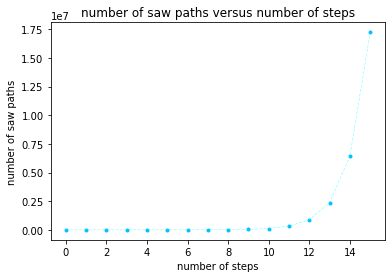

In [14]:
plt.plot(saw_l_num, '.', c = 'deepskyblue')
plt.plot(saw_l_num, c = 'cyan', dashes = [10, 5], linewidth = 0.3)

plt.title("number of saw paths versus number of steps")
plt.ylabel("number of saw paths")
plt.xlabel("number of steps")

plt.savefig("saw.png")

C:\Users\Asus\Anaconda3_0\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


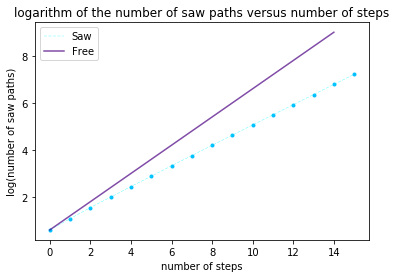

In [16]:
plt.plot(np.log10(saw_l_num), '.', c = 'deepskyblue')
plt.plot(np.log10(saw_l_num), c = 'cyan', dashes = [10, 5], linewidth = 0.3, label = 'Saw')
plt.plot(np.log10(4 ** np.arange(1, 17)), c = 'indigo', alpha = 0.7, label = 'Free')


plt.title("logarithm of the number of saw paths versus number of steps")
plt.ylabel("log(number of saw paths)")
plt.xlabel("number of steps")
plt.legend()

plt.savefig("logsaw.png")